In [561]:

from common.read_spectral_common import (
    data_df_13_09_2022, 
    calculate_matual_info_for_all, 
    generate_sample, create_X_train_Y_train, 
    mutual_info_regression, 
    get_max_bands, 
    get_bands_ix_from_mutual_info, 
    get_average_bands, 
    get_max_bands, 
    get_min_bands,
    predict_using_neutral_network, 
    predict_using_random_forest, 
    predict_using_decision_tree,
    get_full_path
)
import matplotlib.pyplot as plt
import pickle
import cloudpickle
import common
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np

In [562]:
target_value = "K"
train_field = "J"
function_get = get_min_bands

In [563]:
calculate_matual_info_for_all(data_df_13_09_2022, target_value, train_field, function_get)

[(95, 0.3688257039953742),
 (88, 0.29264949390372275),
 (28, 0.25055449189842705),
 (79, 0.24017540446825558),
 (41, 0.2023919235031495),
 (93, 0.20031068770075278),
 (107, 0.18689894820892272),
 (43, 0.1743737023754468),
 (108, 0.1670829649542478),
 (120, 0.1639961441547313),
 (87, 0.15693659342366528),
 (35, 0.15534485985360869),
 (90, 0.1549532095307744),
 (86, 0.1521470136381411),
 (58, 0.14568612217622356),
 (69, 0.13775497079043042),
 (67, 0.12682324501801956),
 (66, 0.1251597902330861),
 (33, 0.12429978570253919),
 (81, 0.12289143117938073),
 (31, 0.12099570427626238),
 (27, 0.12011406356338616),
 (48, 0.11706052679796164),
 (61, 0.11667336363842828),
 (26, 0.1134956172101882),
 (57, 0.11057250396576945),
 (78, 0.10498609407733284),
 (113, 0.1024974947137336),
 (42, 0.09472159304593353),
 (52, 0.09077707628380827),
 (83, 0.09016043895083925),
 (92, 0.0896116344320399),
 (71, 0.08746522884141372),
 (80, 0.08588997947204602),
 (103, 0.07982986527527114),
 (5, 0.07686219803984917),

In [564]:
bands_ix = get_bands_ix_from_mutual_info(data_df_13_09_2022, 0.1, target_value, train_field, function_get)

In [565]:
len(bands_ix)

28

In [566]:
bands_ix = filter(lambda data: data < 100, bands_ix)

In [567]:
bands_ix = list(bands_ix)

In [568]:
bands_ix

[26,
 27,
 28,
 31,
 33,
 35,
 41,
 43,
 48,
 57,
 58,
 61,
 66,
 67,
 69,
 78,
 79,
 81,
 86,
 87,
 88,
 90,
 93,
 95]

In [569]:
len(bands_ix)

24

In [573]:

sample = generate_sample(data_df_13_09_2022, bands_ix, target_value, train_field)
X_train, Y_train = create_X_train_Y_train(sample, bands_ix)
sample_target = generate_sample(data_df_13_09_2022, bands_ix, target_value, "BC")
X_target, Y_target = create_X_train_Y_train(sample_target, bands_ix)
super_param={"lr": 0.0001, "weight_decay": 1e-5, "n_epochs": 40000, "stop_value": 0.5}
re_run = "N"
# loss_NN, pred_NN = predict_using_neutral_network(X_train, Y_train, X_target, Y_target, get_full_path("../../model_saved/NN_save/test_nn_using_mutual_info_2.pt"), super_param, re_run)
# print(f"{loss_NN=}")
# print(f"{pred_NN=}")
loss_RF, pred_RF, RF_model = predict_using_random_forest(X_train, Y_train, X_target, Y_target, bands_ix, super_param)
print(f"{loss_RF=}")
print(f"{pred_RF=}")
loss_DT, pred_DT, DT_model = predict_using_decision_tree(X_train, Y_train, X_target, Y_target, bands_ix, super_param)
print(f"{loss_DT=}")
print(f"{pred_DT=}")

loss_RF=4845.83420908758
pred_RF=array([15201.66283203, 16210.42082031, 17492.31072266, 16148.9052832 ])
loss_DT=5623.96417405234
pred_DT=array([13696.04296875, 18897.9140625 , 18897.9140625 , 16422.01757812])


In [576]:
clf = tree.DecisionTreeRegressor()

In [577]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)

In [578]:
ccp_alphas = path.ccp_alphas

In [579]:
ccp_alphas = ccp_alphas[:-1]

In [580]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)

In [581]:
train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_target, Y_target) for clf_dt in clf_dts]

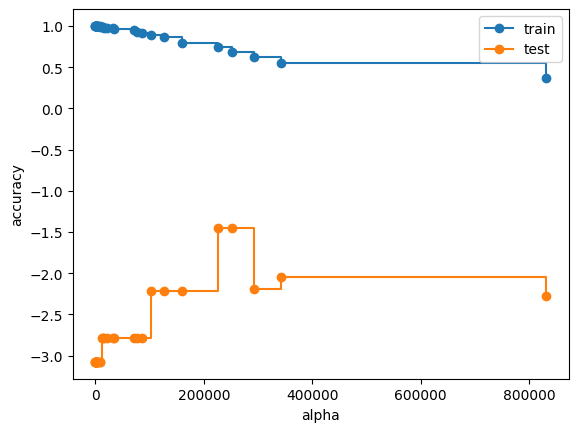

In [583]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [584]:
ccp_alphas

array([0.00000000e+00, 3.06990645e+00, 4.05322330e+01, 9.79735820e+01,
       1.97245875e+02, 2.25248931e+02, 2.88257870e+02, 1.08382715e+03,
       1.13019388e+03, 1.60716077e+03, 2.02846447e+03, 2.13375437e+03,
       2.46659376e+03, 5.34316703e+03, 8.00291636e+03, 8.82193329e+03,
       1.26911759e+04, 1.47853156e+04, 1.57988348e+04, 2.04349896e+04,
       3.32673396e+04, 3.38571161e+04, 7.05795239e+04, 7.59352346e+04,
       8.53380035e+04, 1.01958217e+05, 1.26131426e+05, 1.59709322e+05,
       2.25970003e+05, 2.51173130e+05, 2.93197941e+05, 3.41818946e+05,
       8.32229199e+05])

In [586]:
ccp_alphas[(test_scores == np.max(test_scores)) & (train_scores == np.max(train_scores))]

array([], dtype=float64)

In [588]:
ccp_alpha_maxs = ccp_alphas[(test_scores == np.max(test_scores))]

In [589]:
ccp_alpha_maxs

array([225970.00253265, 251173.1295191 ])

In [599]:
loss = 5000

In [600]:
while loss > 4200:
	clf = tree.DecisionTreeRegressor(ccp_alpha=ccp_alpha_maxs[1])

	Y_train = Y_train.reshape(Y_train.shape[0])
 
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_target)
	loss = np.sqrt(mean_squared_error(Y_target, Y_pred))
	print(loss)

4190.130032836296


In [601]:
ccp_alpha_maxs

array([225970.00253265, 251173.1295191 ])

In [602]:
loss

4190.130032836296

In [603]:
Y_pred = clf.predict(X_target)
loss = np.sqrt(mean_squared_error(Y_target, Y_pred))

In [605]:
DT_model.sklearn_model = clf

In [ ]:
cloudpickle.register_pickle_by_value(common)
with open(get_full_path("../../model_saved/DT_save/J_model_predict_K_DT_24_02_2024_cloudpickle.pkl"), "wb") as file:
    cloudpickle.dump(DT_model, file)